# Python Solutions
## Web Scraping


In [15]:
# Imports

#!pip install wordcloud

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import warnings
import requests
from bs4 import BeautifulSoup
from wordcloud import WordCloud
from PIL import Image

warnings.filterwarnings('ignore')


In [2]:
# Scraping Function

def search_expression(expression: str):
    url = f'https://news.google.com/search?for={expression}&hl=pt-BR&gl=BR&ceid=BR:pt-419'
    response = requests.get(url)
    html_code = response.text
    
    return BeautifulSoup(html_code, 'html.parser')


In [3]:
# Get Informations

data = search_expression('americanas')


In [4]:
# Data Mining

elements = data.find_all('h3')
news = [text.get_text() for text in elements]


In [9]:
# Data Processing

concatenated_words = ''

for text in news:
    splitted_text = text.split()
    
    for word in splitted_text:
        concatenated_words += ' ' + word.lower() + ' '
        
concatenated_words = concatenated_words.replace(':', '')
concatenated_words = concatenated_words.replace(',', '')
concatenated_words = concatenated_words.replace('(', '')
concatenated_words = concatenated_words.replace(')', '')
concatenated_words = concatenated_words.replace('?', '')
concatenated_words = concatenated_words.replace('!', '')
concatenated_words = concatenated_words.replace('.', '')
concatenated_words = concatenated_words.replace('–', '')
concatenated_words = concatenated_words.replace('|', '')
concatenated_words = concatenated_words.replace('"', '')
concatenated_words = concatenated_words.replace('\'', '')
concatenated_words = concatenated_words.replace('“', '')
concatenated_words = concatenated_words.replace('”', '')
concatenated_words = concatenated_words.replace('‘', '')
concatenated_words = concatenated_words.replace('’', '')
concatenated_words = concatenated_words.replace('\\', '')
concatenated_words = concatenated_words.replace(';', '')
concatenated_words = concatenated_words.replace('  ', ' ')
concatenated_words = concatenated_words.replace('   ', ' ')
concatenated_words = concatenated_words.replace('ceo', 'CEO')
concatenated_words = concatenated_words.replace('milhões', 'mi')
concatenated_words = concatenated_words.replace('bilhões', 'bi')
concatenated_words = concatenated_words.replace(' mi ', 'mi ')
concatenated_words = concatenated_words.replace(' bi ', 'bi ')
concatenated_words = concatenated_words.replace('r$ ', 'R$')
concatenated_words = concatenated_words.replace('amer3', 'AMER3')
concatenated_words = concatenated_words.replace('b3sa3', 'B3SA3')
concatenated_words = concatenated_words.replace('b3', 'B3')
concatenated_words = concatenated_words.replace('petr4', 'PETR4')
concatenated_words = concatenated_words.replace('d&o', 'D&O')
concatenated_words = concatenated_words.replace('tok&stok', 'TOK&STOK')
concatenated_words = concatenated_words.replace('tok stok', 'TOK&STOK')
concatenated_words = concatenated_words.replace('TOK STOK', 'TOK&STOK')
concatenated_words = concatenated_words.replace('fiis', 'FIIS')
concatenated_words = concatenated_words.replace('pt', 'PT')
concatenated_words = concatenated_words.replace('lula', 'Lula')
concatenated_words = concatenated_words.replace('júlio', 'Júlio')
concatenated_words = concatenated_words.replace('stj', 'STJ')


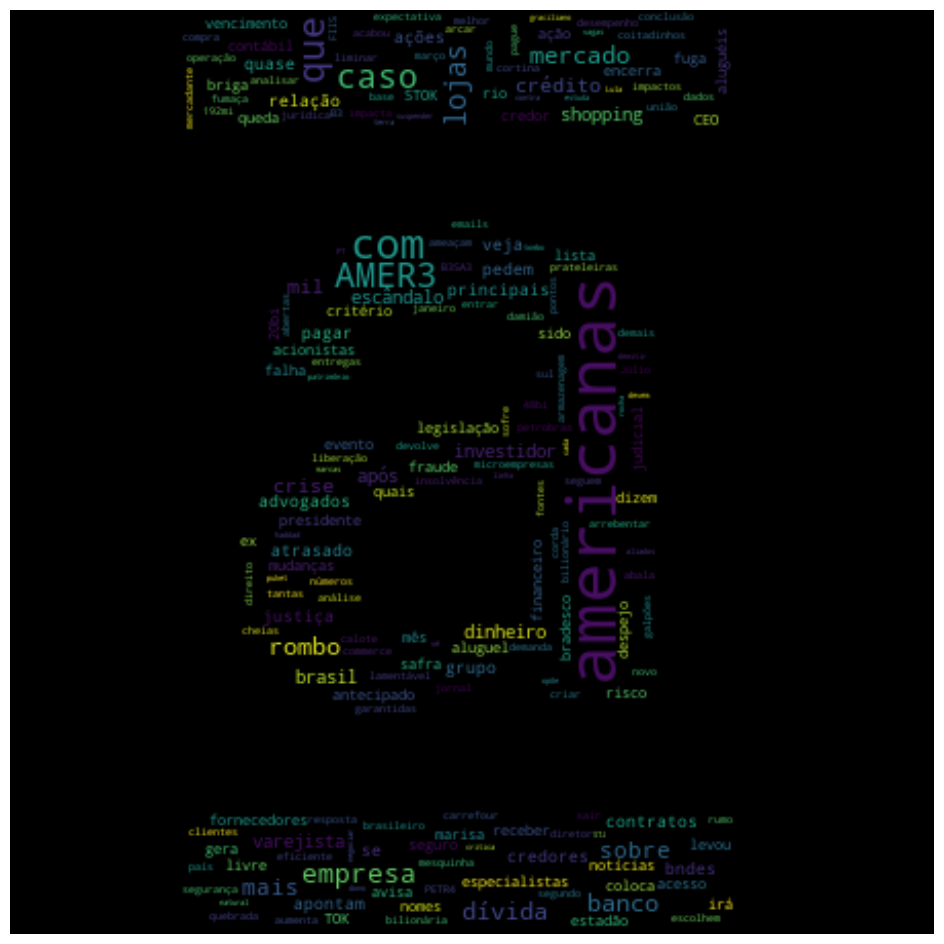

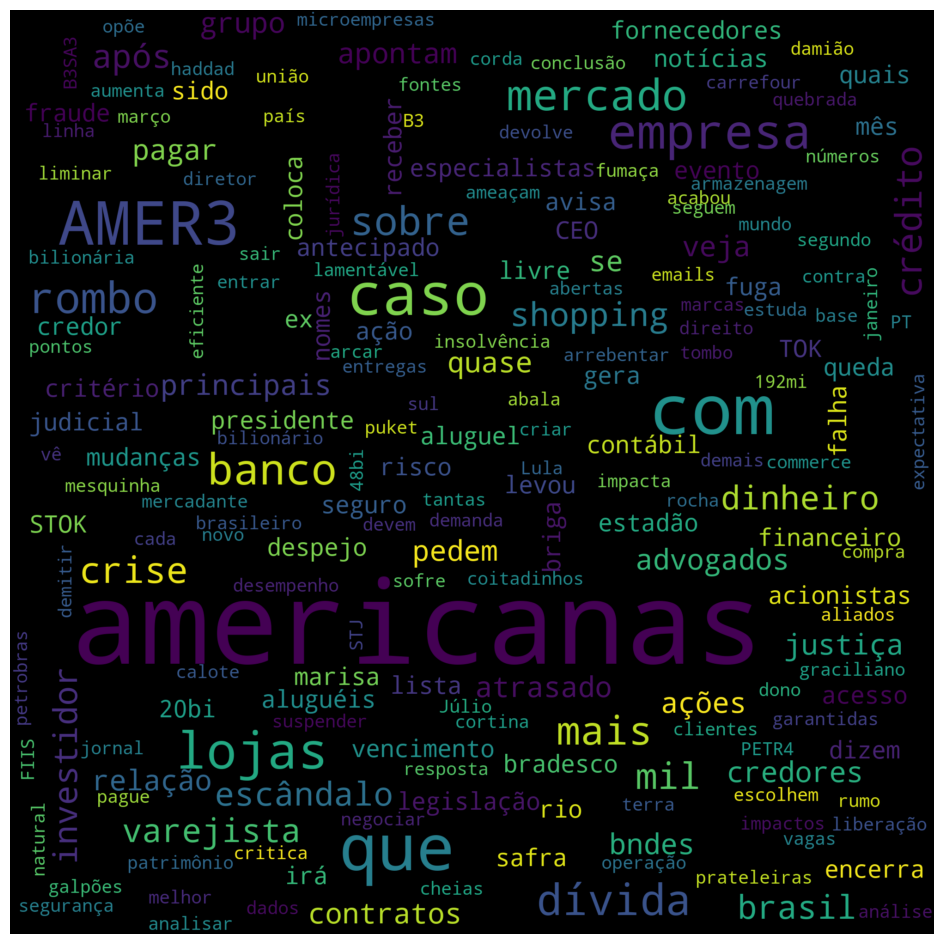

In [25]:
# Word Cloud

# With Mask

mask = np.array(Image.open('logo-americanas.png'))

word_cloud = WordCloud(
    width=2000, height=2000,
    collocations=False,
    mask=mask,
    stopwords=['por', 'o', 'a', 'e', 'ao', 'não', 'tem', 'em', 'à', 'na', 'deve', 'do', 'da', 'dos', 'das', 'está', 'deve',
              'tenho', 'podem', 'passo', 'mesmo', 'diz', 'quem', 'no', 'na', 'nos', 'nas', 'um', 'uma', 'são', 'meu', 'já',
               'foi', 'sua', 'suas', 'está', 'estão', 'os', 'as', 'vai', 'seu', 'pode', 'querem', 'D', 'como', 'é', 'mas',
               'R', 'oi', 'saiba', 'de', 'onde', 'para']
).generate(concatenated_words)

fig, ax = plt.subplots(figsize=(12,12))
ax.imshow(word_cloud, interpolation='bilinear')
plt.axis('off')
plt.savefig('Word Cloud - with mask.png');

# Without Mask

word_cloud = WordCloud(
    width=2000, height=2000,
    collocations=False,
    stopwords=['por', 'o', 'a', 'e', 'ao', 'não', 'tem', 'em', 'à', 'na', 'deve', 'do', 'da', 'dos', 'das', 'está', 'deve',
              'tenho', 'podem', 'passo', 'mesmo', 'diz', 'quem', 'no', 'na', 'nos', 'nas', 'um', 'uma', 'são', 'meu', 'já',
               'foi', 'sua', 'suas', 'está', 'estão', 'os', 'as', 'vai', 'seu', 'pode', 'querem', 'D', 'como', 'é', 'mas',
               'R', 'oi', 'saiba', 'de', 'onde', 'para']
).generate(concatenated_words)

fig, ax = plt.subplots(figsize=(12,12))
ax.imshow(word_cloud, interpolation='bilinear')
plt.axis('off')
plt.savefig('Word Cloud - without mask.png');
